<a href="https://colab.research.google.com/github/joaoSouza2121/machine-learning/blob/main/Machine_Learning_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="blue">Machine Learning</font>

<font color="DarkRed">Estudo de Machine Learning em Linguagem R</font>

#<font color="orange">Algoritmo - Naive Bayes</font>

In [4]:
# Instalando e Carregando bibliotecas
install.packages("forecast")
library(rpart)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [6]:
# criando o modelo usando o conjunto de dados Iris
iris_part <- iris
colnames(iris_part)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

#Arvore de Decisão para Regressão - rpart

In [8]:
# rpart -> cria uma arvore de decisão
modelo = rpart(Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + Species, data = iris_part)
summary(modelo)

Call:
rpart(formula = Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + 
    Species, data = iris_part)
  n= 150 

          CP nsplit rel error    xerror       xstd
1 0.61346237      0 1.0000000 1.0246464 0.10032833
2 0.12180701      1 0.3865376 0.3967071 0.04903025
3 0.05718872      2 0.2647306 0.2930780 0.03104241
4 0.02980452      3 0.2075419 0.2419413 0.02957875
5 0.02303165      4 0.1777374 0.2445557 0.02691471
6 0.01698037      5 0.1547057 0.2417214 0.02735221
7 0.01000000      6 0.1377254 0.2272045 0.02514230

Variable importance
Petal.Length  Petal.Width      Species  Sepal.Width 
          37           27           22           15 

Node number 1: 150 observations,    complexity param=0.6134624
  mean=5.843333, MSE=0.6811222 
  left son=2 (73 obs) right son=3 (77 obs)
  Primary splits:
      Petal.Length < 4.25 to the left,  improve=0.61346240, (0 missing)
      Petal.Width  < 1.15 to the left,  improve=0.58031680, (0 missing)
      Species      splits as  LRR,      i

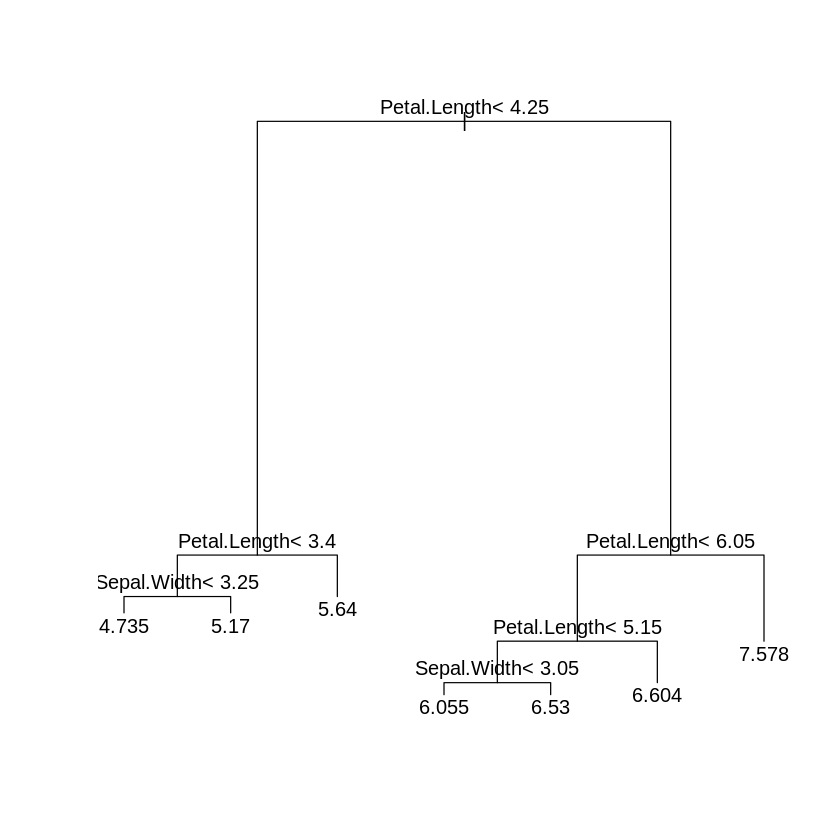

In [9]:
# Visualização do modelo criado
plot(modelo)
text(modelo)

In [10]:
# previsão
predicao = predict(modelo, iris_part)
head(predicao)

1        2        3        4        5        6 
5.169697 4.735000 4.735000 4.735000 5.169697 5.169697

In [12]:
# Comparando a previsão com dados reais
comparacao = cbind(predicao, iris_part$Petal.Length, predicao - iris_part$Sepal.Length)
head(comparacao)

,predicao,,
1,5.169697,1.4,0.06969697
2,4.735000,1.4,-0.16500000
3,4.735000,1.3,0.03500000
4,4.735000,1.5,0.13500000
5,5.169697,1.4,0.16969697
6,5.169697,1.7,-0.23030303


In [13]:
# Verificamos métricas de erro de nosso modelo
accuracy(predicao, iris_part$Petal.Length)

,ME,RMSE,MAE,MPE,MAPE
Test set,-2.085333,2.354953,2.085333,-102.2052,102.2052


#Árvore de Decisão Para Classificação

Estudo de Caso

Usando dados historicos de clientes para prever se um novo cliente é ou não bom pagador de um determinado emprestimo.

In [14]:
library(rpart)

In [17]:
# carrega a base de dados
credito = read.csv("dados/Credit.csv")

# criando uma amostra
amostra = sample(2, 1000, replace = T, prob = c(0.7, 0.3))

# criando dados de treino e de teste -> holdout
credito_treino <- credito[amostra==1, ]
credito_teste <- credito[amostra==2, ]

In [18]:
# Criando o modelo de arvore de decisão para classificação
arvore <- rpart(class ~ ., data = credito_treino, method = "class")

In [19]:
# visualizando a arvore gerada de forma textual
print(arvore)

n= 688 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 688 201 good (0.29215116 0.70784884)  
   2) checking_status=<0,>=200,0<=X<200 416 173 good (0.41586538 0.58413462)  
     4) credit_history='all paid','no credits/all paid' 49  14 bad (0.71428571 0.28571429)  
       8) purpose='new car',education,furniture/equipment,other,radio/tv,repairs 29   4 bad (0.86206897 0.13793103) *
       9) purpose='used car',business,retraining 20  10 bad (0.50000000 0.50000000)  
        18) other_payment_plans=none,stores 13   4 bad (0.69230769 0.30769231) *
        19) other_payment_plans=bank 7   1 good (0.14285714 0.85714286) *
     5) credit_history='critical/other existing credit','delayed previously','existing paid' 367 138 good (0.37602180 0.62397820)  
      10) duration>=17 205  97 good (0.47317073 0.52682927)  
        20) purpose='domestic appliance','new car',education,radio/tv,repairs 112  44 bad (0.60714286 0.39285714)  
          40) employment=<1,1<=X<4

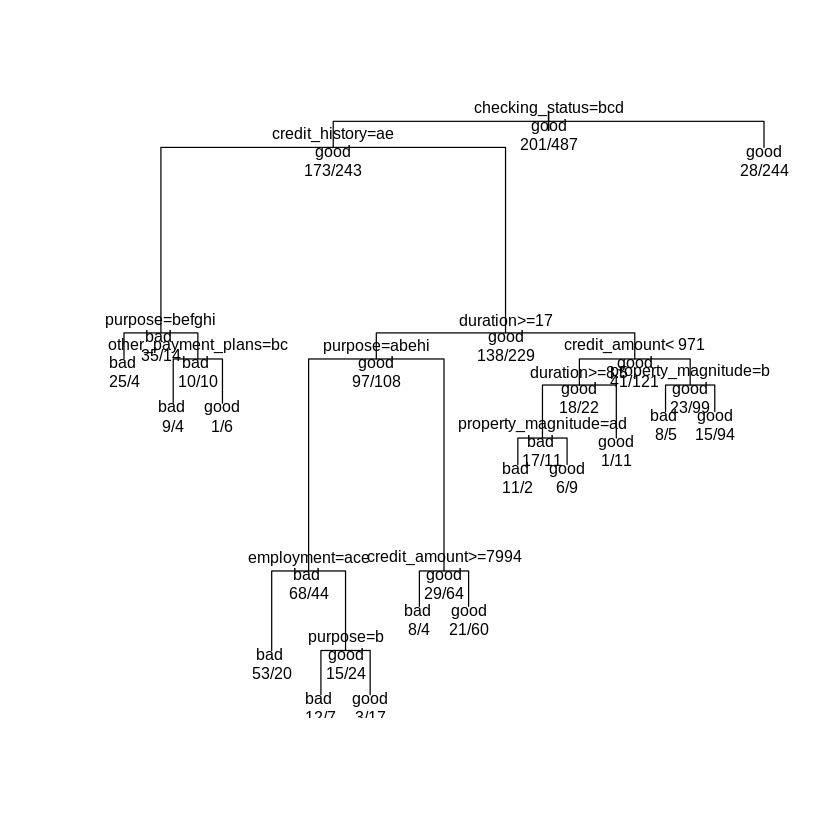

In [20]:
# visualizando de forma grafica
plot(arvore)
text(arvore, use.n = TRUE, all = TRUE, cex = .8)

In [22]:
# previsao com dados de teste
teste <- predict(arvore, newdata = credito_teste)
head(teste)

,bad,good
2,0.7260274,0.2739726
3,0.1029412,0.8970588
4,0.2592593,0.7407407
6,0.1029412,0.8970588
15,0.1376147,0.8623853
28,0.8620690,0.1379310


In [25]:
# Adicionando uma coluna a credito_teste
cred <- cbind(credito_teste, teste)
head(cred)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,none,own,1,skilled,1,none,yes,bad,0.7260274,0.2739726
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,⋯,none,own,1,'unskilled resident',2,none,yes,good,0.1029412,0.8970588
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,⋯,none,'for free',1,skilled,2,none,yes,good,0.2592593,0.7407407
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,⋯,none,'for free',1,'unskilled resident',2,yes,yes,good,0.1029412,0.8970588
15,<0,15,'existing paid','new car',1403,<100,1<=X<4,2,'female div/dep/mar',none,⋯,none,rent,1,skilled,1,none,yes,good,0.1376147,0.8623853
28,>=200,12,'all paid',radio/tv,409,>=1000,1<=X<4,3,'female div/dep/mar',none,⋯,none,rent,2,skilled,1,none,yes,good,0.8620690,0.1379310


In [40]:
# Cria uma coluna resultado categorigo
cred['Reult'] = ifelse(cred$bad >=0.5, "bad","good")
head(cred)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good,Reult
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,own,1,skilled,1,none,yes,bad,0.7260274,0.2739726,bad
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,⋯,own,1,'unskilled resident',2,none,yes,good,0.1029412,0.8970588,good
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,⋯,'for free',1,skilled,2,none,yes,good,0.2592593,0.7407407,good
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,⋯,'for free',1,'unskilled resident',2,yes,yes,good,0.1029412,0.8970588,good
15,<0,15,'existing paid','new car',1403,<100,1<=X<4,2,'female div/dep/mar',none,⋯,rent,1,skilled,1,none,yes,good,0.1376147,0.8623853,good
28,>=200,12,'all paid',radio/tv,409,>=1000,1<=X<4,3,'female div/dep/mar',none,⋯,rent,2,skilled,1,none,yes,good,0.8620690,0.1379310,bad


# Matriz de Confusão

In [41]:
confusao <- table(cred$class, cred$Reult)




In [46]:
confusao

      
       bad good
  bad   42   57
  good  34  179

In [44]:
taxa_acerto <- (confusao[1] + confusao[4]) / sum(confusao)


[1] "A taxa de acerto do modelo foi de "


In [45]:
taxa_acerto

[1] 0.7083333

# Algoritmo de Naive Bayes -> para prever se um clienete é ou nao bom pagador, usado a base de dados de credito historico

In [47]:
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [48]:
dim(credito)

[1] 1000   21

In [49]:
# Tranformamos a classe em fator
credito$class = as.factor(credito$class)

In [52]:
# Separamos os dados de treino e de teste
# amostra
amostra <- sample(2, 1000, replace = T, prob = c(0.7, 0.3))
cred_treino = credito[amostra==1, ]
cred_teste = credito[amostra==2, ]

In [53]:
# Dimensão dos dados de treino e de teste
print(dim(cred_treino))
print(dim(cred_teste))

[1] 687  21
[1] 313  21


In [55]:
# criando o modelo
naive_model <- naiveBayes(class ~ . , cred_treino)
naive_model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
     bad     good 
0.294032 0.705968 

Conditional probabilities:
      checking_status
Y      'no checking'         <0      >=200   0<=X<200
  bad     0.15346535 0.42574257 0.05445545 0.36633663
  good    0.48453608 0.20824742 0.06804124 0.23917526

      duration
Y          [,1]     [,2]
  bad  24.93069 13.05309
  good 18.77526 10.86207

      credit_history
Y      'all paid' 'critical/other existing credit' 'delayed previously'
  bad  0.08415842                       0.17326733           0.09405941
  good 0.02886598                       0.33608247           0.08247423
      credit_history
Y      'existing paid' 'no credits/all paid'
  bad       0.55940594            0.08910891
  good      0.52577320            0.02680412

      purpose
Y      'domestic appliance'   'new car'  'used car'    business   education
  bad           0.014851485 0.316831683 

In [57]:
# previsão
previsao <- predict(naive_model, cred_teste)
previsao

[1] good bad  good bad  good good good good good good good good bad  good good
 [16] good good bad  good good good bad  good good good good good good good good
 [31] good good good bad  good good bad  good good good good good bad  good good
 [46] good bad  good good good good good bad  good bad  good good good bad  good
 [61] good good good good bad  good good bad  good bad  good good bad  good good
 [76] good good good bad  good good good good good good good good good bad  good
 [91] good bad  good good bad  good good good good bad  good good good bad  good
[106] good good bad  bad  good bad  good good good good good good bad  good good
[121] good good bad  good good good good good bad  good good good bad  good good
[136] good bad  good good bad  good good good good good good good good good good
[151] good good bad  good good good bad  good good good good good bad  good good
[166] bad  bad  good good bad  good bad  bad  good good good good good good bad 
[181] good bad  good good good good good bad  bad  good bad  bad  good good good
[196] good bad  good bad  bad  good good good bad  good bad  good good bad  bad 
[211] good good good good bad  good good good bad  good good bad  bad  good good
[226] good good good good bad  good good good good bad  good good bad  good good
[241] good good bad  good good good bad  bad  good good good good good bad  good
[256] good good good good good bad  good good good good good bad  good good bad 
[271] good good good good good bad  bad  good good good good good good bad  good
[286] bad  good good bad  good good good good good bad  good good good good good
[301] bad  good good good good bad  good good good bad  good good bad 
Levels: bad good

Matriz de Confusão

In [60]:
confusion <- table(cred_teste$class, previsao)



In [61]:
confusion

      previsao
       bad good
  bad   46   52
  good  30  185

In [62]:
# taxa de acerto
taxaAcerto = (confusion[1] + confusion[4]) / sum(confusion)
taxaAcerto

[1] 0.7380192

#<font color="blue">Seleção de Atributos</font>

In [63]:
install.packages("randomForest")
library(randomForest)
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [66]:
# carrega a base de dados
credito = read.csv("dados/Credit.csv")
credito$class = as.factor(credito$class)
# criando uma amostra
set.seed(234)
amostra = sample(2, 1000, replace = T, prob = c(0.7, 0.3))

# criando dados de treino e de teste -> holdout
credito_treino <- credito[amostra==1, ]
credito_teste <- credito[amostra==2, ]


In [67]:
# Criando um modelo com todos os atributos e avaliando a acuracia
modelo_svc1 <- svm(class ~ ., credito_treino)

In [68]:
# previsao
previsao_svm1 <- predict(modelo_svc1, credito_teste)

In [70]:
# Matriz de Confusão
svm_confusao <- table(credito_teste$class, previsao_svm1)

# taxa de acerto do modelo
tx_acerto = (svm_confusao[1] + svm_confusao[4]) / sum(svm_confusao)
tx_acerto 

[1] 0.7557252

#Aplicando um método de seleção de atribus

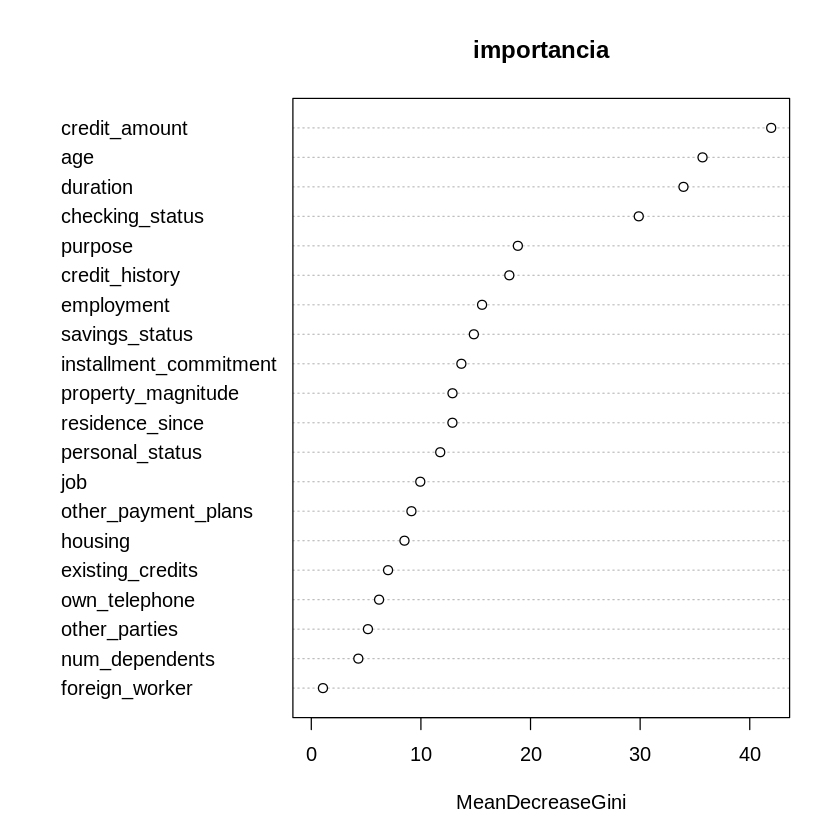

In [71]:
importancia <- randomForest(class ~ ., data = credito_treino)
col = importance(importancia)
varImpPlot(importancia)

Criando um segundo modelo com as variaveis independentes mais importante.

In [73]:
# credit_amount + age + duration + checking_status
modelo_svc2 <- svm(class ~ credit_amount + age + duration + checking_status, credito_treino)

In [75]:
# previsao
previsao_svm2 <- predict(modelo_svc2, credito_teste)

# matriz de confusao
matriz_conf <- table(credito_teste$class, previsao_svm2)

# taxa de acerto
taxa_acerto <- (matriz_conf[1] + matriz_conf[4]) / sum(matriz_conf)
taxa_acerto


[1] 0.7748092